## MNIST machine learning exercise

In this exercise we will compare the performance of three different modeling approaches at predicting handwritten numbers. 

We use the MNIST data set;

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Load libraries

In [28]:
from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 


np.random.seed(1)

## Load data and explore/get to know the data structure



Load the MNIST digits dataset. It's originally from UCI machine learning library, but included in SKLearn.

In [2]:
mnist = datasets.load_digits() # sklearn includes this data set .. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Notice that the dataset is stored in a dictionary

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Note that there are 1797 images.

In [4]:
print(len(mnist.data))

1797


Images are 8x8 grid of values epresenting the gray level for each pixel (16 levels of grey -- from 0 (black) to 15 (white)). 

In [5]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

To analyze this, we simple turn this into a one dimensional array (so we will x1, x2, ... x63, x64). This has already been done for us, and is stored in the data key.

In [6]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
print(mnist.target[0])
print(mnist.target[1])
print(mnist.target[2])
print(mnist.target[3])
print(mnist.target[4])
print(mnist.target[5])
print(mnist.target[6])

0
1
2
3
4
5
6


We can use matplotlib to display a sample of these images from the data.

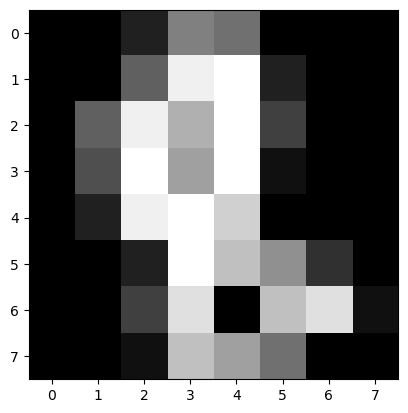

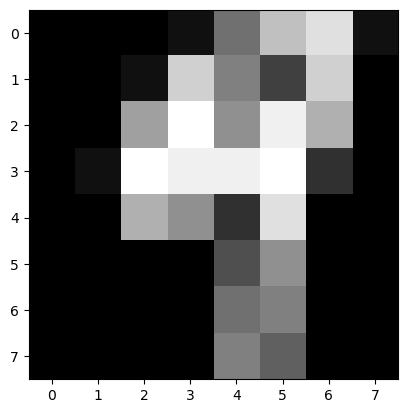

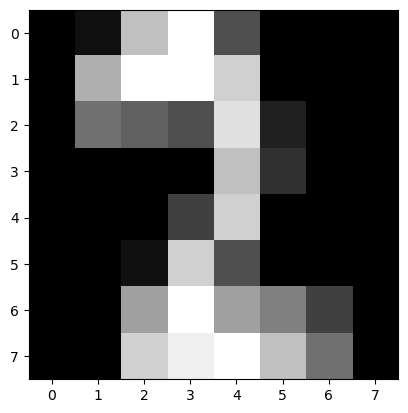

In [9]:
for i in np.random.choice(range(0,len(mnist.images)), 3): # choose 4 at random
  plt.imshow(mnist.images[i], cmap='gray')
  plt.show()

## Split data into training and test sets


In [10]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=1)

### Neural Net

In [12]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(60,50,40), solver='adam', max_iter=200)
_ = ann.fit(X_train, y_train)

Wall time: 4.02 s


In [13]:
%%time
y_pred = ann.predict(X_test)

Wall time: 7.54 ms


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.98      0.96      0.97        49
           2       0.96      0.98      0.97        49
           3       1.00      0.97      0.98        64
           4       0.95      0.95      0.95        61
           5       0.87      0.96      0.91        47
           6       0.98      1.00      0.99        51
           7       0.98      0.95      0.96        57
           8       0.98      0.89      0.93        46
           9       0.90      0.96      0.93        57

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



In [15]:
performance = pd.DataFrame({"model": [], "Accuracy": []})

## With RandomizedSearchCV

In [22]:
%%time

score_measure = "accuracy"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (70,),(50,30), (40,20)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.2, 0.5],
    'max_iter': [200]
}

ann = MLPClassifier()
grid_search = RandomizedSearchCV(estimator = ann, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'solver': 'adam', 'max_iter': 200, 'learning_rate_init': 0.01, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (70,), 'alpha': 0.2, 'activation': 'relu'}
Wall time: 1min 36s


In [23]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       1.00      0.90      0.95        49
           2       0.86      1.00      0.92        49
           3       0.98      0.98      0.98        64
           4       0.98      1.00      0.99        61
           5       0.98      0.94      0.96        47
           6       0.98      1.00      0.99        51
           7       1.00      0.96      0.98        57
           8       0.96      0.96      0.96        46
           9       0.96      0.96      0.96        57

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

Wall time: 18.9 ms


## With GridSearchCV

In [24]:
%%time

score_measure = "accuracy"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (30,), (50,), (70,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [.5, .7, 1],
    'learning_rate': ['adaptive', 'invscaling'],
    'learning_rate_init': [0.005, 0.01, 0.15],
    'max_iter': [100]
}

ann = MLPClassifier()
grid_search = GridSearchCV(estimator = ann, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'activation': 'tanh', 'alpha': 0.7, 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.005, 'max_iter': 100, 'solver': 'adam'}
Wall time: 48.3 s


In [25]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))
print(f"{score_measure} score for NN: {grid_search.best_score_}")

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       1.00      0.96      0.98        49
           2       1.00      1.00      1.00        49
           3       1.00      0.98      0.99        64
           4       0.97      1.00      0.98        61
           5       0.98      0.98      0.98        47
           6       1.00      1.00      1.00        51
           7       1.00      0.98      0.99        57
           8       0.94      0.98      0.96        46
           9       0.95      0.96      0.96        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

accuracy score for NN: 0.9697780307342061
Wall time: 17.6 ms


In [26]:
performance = pd.concat([performance, pd.DataFrame({'model':"Neural Net",'Accuracy': grid_search.best_score_},index = [0])])

### D tree Random Search

In [29]:
score_measure = "accuracy"
kfolds = 3

param_grid = {
    'min_samples_split': np.arange(1,100),  
    'min_samples_leaf': np.arange(1,100),
    'min_impurity_decrease': np.arange(0.0001, 0.01, 0.0005),
    'max_leaf_nodes': np.arange(5, 100), 
    'max_depth': np.arange(5,15), 
    'criterion': ['entropy', 'gini'],
}

dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=50,
                           scoring=score_measure, verbose=1, n_jobs=-1, 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
The best accuracy score is 0.741447891805887
... with parameters: {'min_samples_split': 61, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.0086, 'max_leaf_nodes': 97, 'max_depth': 9, 'criterion': 'entropy'}


### D tree grid search

In [30]:
score_measure = "accuracy"
kfolds = 3
min_samples_split = rand_search.best_params_['min_samples_split']
min_samples_leaf = rand_search.best_params_['min_samples_leaf']
min_impurity_decrease = rand_search.best_params_['min_impurity_decrease']
max_leaf_nodes = rand_search.best_params_['max_leaf_nodes']
max_depth = rand_search.best_params_['max_depth']
criterion = rand_search.best_params_['criterion']

param_grid = {
    'min_samples_split': np.arange(min_samples_split-2,min_samples_split+2),  
    'min_samples_leaf': np.arange(min_samples_leaf-2,min_samples_leaf+2),
    'min_impurity_decrease': np.arange(min_impurity_decrease-0.0001, min_impurity_decrease+0.0001, 0.00005),
    'max_leaf_nodes': np.arange(max_leaf_nodes-2,max_leaf_nodes+2), 
    'max_depth': np.arange(max_depth-2,max_depth+2), 
    'criterion': [criterion]
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)


print(f"... with parameters: {grid_search.best_params_}")

bestAccuracyTree = grid_search.best_estimator_

print(f"{score_measure} score for Decision Tree: {grid_search.best_score_}")

Fitting 3 folds for each of 1024 candidates, totalling 3072 fits
... with parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.0085, 'min_samples_leaf': 3, 'min_samples_split': 59}
accuracy score for Decision Tree: 0.7438345266507557


In [31]:
performance = pd.concat([performance, pd.DataFrame({'model':"Decision Tree",'Accuracy':grid_search.best_score_},index = [1])])

In [32]:
performance

,model,Accuracy
0,Neural Net,0.969778
1,Decision Tree,0.743835


The results show that Neural nets perform much better than decision trees in terms of accuracy as it correctly classifies 96% of the data. 